In [15]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install jovian

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement jovian (from versions: none)
ERROR: No matching distribution found for jovian


In [17]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [18]:
dataset = MNIST(root='data/',download=True)

In [19]:
len(dataset)

60000

In [20]:
import matplotlib.pyplot as plt

label: 5


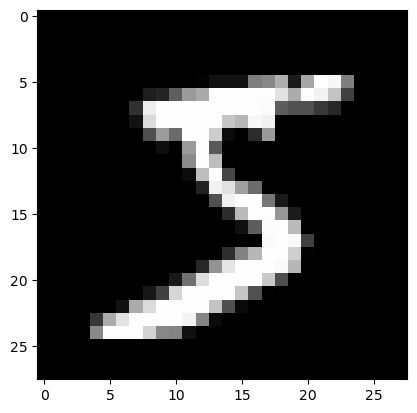

In [21]:
image,label = dataset[0]
plt.imshow(image,cmap='gray')
print('label:',label)

In [22]:
#pytorch work with tensors so we need to convert these images to tensors and specifying a transforms parameter in the
#MNIST class

In [23]:
import torchvision.transforms as transforms

In [24]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [25]:
image_tensor,label = dataset[0]
print(image_tensor.shape,label)

torch.Size([1, 28, 28]) 5


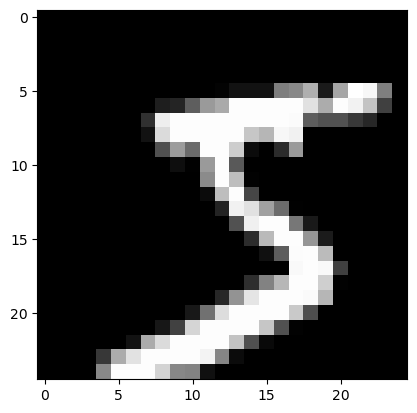

In [26]:
plt.imshow(image_tensor[0,0:25,0:25], cmap='gray')


In [27]:
#we must split our dataset into training, validation and testing datasets but there are no  pre 
#defined method for splitting the dataset,hence we write a method to do so

In [28]:
import numpy as np
#below, we define a split_indices function that randomly shuffles the array indices, 0,1 to n-1, and separates out a desired  
#from it for the validation set. Indices shuffling is important because training images are often ordered by  target labels 
#that isimages of zero's followed by images of one's and so on. So if we were to pick 20% for vlidation set 
#simply by selecting the last 20% of the training images. The validation set will only contain images of 8s and 9s
#whereas the training set will consist of no images of 8s and 9s

In [29]:
def split_indices(n,val_pct):
    #determine size of validation set
    n_val = int(val_pct*n)
    #create a random permutation of 0 to n-1
    idx = np.random.permutation(n)
    #pick first n_val indices for validation set
    return idx[n_val:],idx[:n_val]

In [30]:
train_indices,val_indices = split_indices(len(dataset), val_pct=0.2)

In [31]:
print(len(train_indices),len(val_indices))
print('sample val_indices:',val_indices[:20])

48000 12000
sample val_indices: [41480 16833 49632 33318  9751 42392 45538 34378 44807 58952 36676 51856
 28405 26616 13773 36781 13786 56830 54589 10219]


In [32]:
#we have randomly shuffled the indices and selected a small portion(20%) as the validation set
#we now create a pytorch dataloader for each of these using a "SubsetRandomSampler", which samples elements randomly 
#from a given list of indices,while creating batches of data

In [33]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [34]:
batch_size = 100
#define train_sampler and train_loader

train_sampler =SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

#validation_sampler and validation_loader

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [35]:
#since we now have our train and validation datasets, we will create our model using logistic regression
#here we use the same nn.linear class to create the model.Since nn.linear expects each training example to be a vector, 
#each 1x28x28 image tensor needs to be flattened out into a vector of size 784(28x28),before being passed into the model
#the output for each image is vector of size 10,with each element of the vector signifying the probability a particular target
#label(ie 0 to 9).The predicted label for an image is simply the one with the highest probability

In [36]:
import torch.nn as nn


In [37]:
input_size = 28*28
num_classes = 10
#logistic regression model

model = nn.Linear(input_size,num_classes)

In [38]:
#this model is quite larger than in our previous model in terms of number of parameters

In [39]:
print(model.weight.shape)


torch.Size([10, 784])


In [40]:
print(model.bias.shape)

torch.Size([10])


In [41]:
#we then take the first 100 batch of datasets to train our model

In [42]:
for image,label in train_loader:
    print(image.shape)
    print(label)
    output = model(image)
    break

torch.Size([100, 1, 28, 28])
tensor([9, 8, 7, 9, 7, 5, 8, 3, 0, 7, 6, 9, 2, 4, 3, 9, 1, 0, 6, 2, 0, 2, 1, 9,
        9, 1, 7, 6, 3, 5, 8, 9, 7, 1, 4, 7, 1, 4, 9, 4, 0, 1, 4, 5, 4, 3, 4, 7,
        2, 6, 9, 0, 8, 0, 5, 1, 5, 5, 4, 9, 3, 2, 5, 4, 7, 8, 0, 4, 1, 1, 5, 1,
        5, 7, 2, 3, 1, 6, 7, 6, 3, 3, 6, 0, 7, 7, 1, 1, 2, 7, 2, 8, 2, 8, 7, 9,
        7, 7, 7, 3])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [ ]:
#the above procedure led to an error because our input data does not have the right shape.Our
#images are of the shape 1x28x28 but we need them to be vectors of size 784(28x28).
#we therefore use the .reshape method of a tensor to view the image of a flattened tensor(vector),
#without changing the underlying data.we do this by defining a class that extends the nn.Module from pytorch.

In [43]:

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

print(model.parameters())



<generator object Module.parameters at 0x0000029566A19380>


In [44]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())


torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0195,  0.0219,  0.0190,  ..., -0.0048,  0.0051,  0.0046],
         [ 0.0170,  0.0203, -0.0315,  ..., -0.0289, -0.0110,  0.0106],
         [ 0.0073, -0.0231, -0.0310,  ..., -0.0149,  0.0054,  0.0252],
         ...,
         [ 0.0135, -0.0338, -0.0163,  ..., -0.0282, -0.0019, -0.0354],
         [-0.0125,  0.0173, -0.0203,  ..., -0.0285,  0.0343, -0.0098],
         [-0.0159, -0.0063,  0.0174,  ..., -0.0314, -0.0212,  0.0083]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0108, -0.0048,  0.0046, -0.0084,  0.0177, -0.0288, -0.0188, -0.0071,
          0.0256, -0.0344], requires_grad=True)]

In [45]:
for image,labels in train_loader:
    outputs = model(image)
    break
    
print('outputs.shape:',outputs.shape)
print('sample outputs:\n',outputs[:2].data)

outputs.shape: torch.Size([100, 10])
sample outputs:
 tensor([[-0.0553, -0.0398,  0.1611, -0.1766,  0.1930, -0.0501, -0.0731, -0.2343,
         -0.2230,  0.4526],
        [ 0.0201,  0.0846,  0.3769, -0.0413,  0.2072, -0.0846,  0.0033, -0.0280,
         -0.1457, -0.1204]])


In [ ]:
#for each of the 100 input images, we get 10 outputs, one for each class.As discussed earlier,we'd like
#these outputs to represent probabilities,but for that to happen,the element of each output row must lie between0 and 1
#which is not so in this case. To convert the output rows into probabilities,we use the softmax function,
#will write the formula in my notebook

In [46]:
import torch.nn.functional as f
probs = f.softmax(outputs,dim=1)
#look at sample probabilities
print('sample probabilities:\n',probs[:2].data)

#add up the probabilities of an output row
print('sum:',torch.sum(probs[0]).item())

sample probabilities:
 tensor([[0.0930, 0.0944, 0.1154, 0.0824, 0.1192, 0.0935, 0.0913, 0.0777, 0.0786,
         0.1545],
        [0.0981, 0.1046, 0.1401, 0.0922, 0.1183, 0.0883, 0.0965, 0.0935, 0.0831,
         0.0852]])
sum: 1.0000001192092896


In [ ]:
#from the sample probabilities above, the model says there is a 0.08 prob that the image is a 1,
#0.10 that it is a 2 and so on, as there are ten outputs,each in a row.
#we can finally determine the predicted label for each image by simply 
#choosing the index of the element with highest probability in each output row.This is done using the torch.max function 
#which returns the largest element and index of the largest element along a particular dimension of a tensor

In [47]:
max_probs,preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([9, 2, 6, 9, 7, 2, 4, 4, 5, 2, 9, 2, 4, 0, 9, 5, 3, 0, 5, 4, 4, 0, 2, 4,
        9, 9, 4, 4, 4, 5, 2, 1, 5, 1, 3, 9, 9, 4, 9, 9, 4, 4, 3, 0, 4, 4, 2, 2,
        9, 2, 4, 7, 5, 2, 2, 4, 9, 2, 0, 7, 9, 0, 5, 7, 9, 4, 9, 1, 3, 4, 4, 9,
        4, 9, 7, 6, 4, 5, 4, 0, 4, 4, 4, 9, 7, 2, 4, 5, 5, 4, 3, 9, 5, 0, 4, 7,
        5, 2, 5, 4])
tensor([0.1545, 0.1401, 0.1283, 0.1328, 0.1166, 0.1365, 0.1509, 0.1539, 0.1449,
        0.1250, 0.1269, 0.1327, 0.1410, 0.1257, 0.1144, 0.1202, 0.1212, 0.1105,
        0.1272, 0.1279, 0.1566, 0.1353, 0.1231, 0.1460, 0.1236, 0.1440, 0.1266,
        0.1593, 0.1174, 0.1450, 0.1418, 0.1564, 0.1300, 0.1183, 0.1193, 0.1272,
        0.1416, 0.1204, 0.1205, 0.1360, 0.1292, 0.1309, 0.1331, 0.1304, 0.1206,
        0.1202, 0.1354, 0.1457, 0.1101, 0.1230, 0.1391, 0.1359, 0.1398, 0.1260,
        0.1374, 0.1336, 0.1317, 0.1266, 0.1336, 0.1332, 0.1347, 0.1218, 0.1409,
        0.1348, 0.1179, 0.1284, 0.1213, 0.1150, 0.1320, 0.1734, 0.1280, 0.1328,
        0.1133, 0.1

In [ ]:
preds==labels

In [48]:
def accuracy(preds,labels):
    return torch.sum(preds==labels).item()/len(preds)

In [49]:
accuracy(preds,labels)

0.11

In [ ]:
#we can see that our prediction above is very different from our actual labels above and this is because 
#we randomly initialized weights and biases,hence we train the model using gradient decent

In [ ]:
#EVALUATING METRICS AND LOSS FUNCTION 

In [50]:
loss_fn = f.cross_entropy

In [51]:
loss = loss_fn(outputs,labels)
print(loss)


tensor(2.3039, grad_fn=<NllLossBackward0>)


In [ ]:
#since the cross entropy is the negative log of the predicted probability 
#of the correct label averaged over all training samples,one way to inteprete the resulting number,eg;
#2.23 is to look at e^-2.3 which is around 0.1 as the predicted probability of the correct label,on average.
#the lower  the loss, the better the model
#the loss is telling us that the model is predicting the current class is 10% probable, 
#but we want to push it ti more than 50% probable hence we optimize it

In [52]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
#MODEL TRAINING

In [53]:
#repeat for given num of epochs
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):

        preds = model(xb)
        loss = loss_fn(preds,yb)
        if opt is not None:
            #compute gradient of loss
            loss.backward()
            #update predictions using gradients
            opt.step()
            #reset gradients to zero
            opt.zero_grad()
            metric_result = None
        if metric is not None:
                #compute metric
                metric_result = metric(preds,yb)
                
        return loss.item(),len(xb),metric_result
                
            
    
            
                  
    

In [ ]:
#next, we define an evaluate function that calculates the overall loss for the validation set

In [56]:
def evaluate(model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
        #separate losses,counts and metrics
        losses,nums,metrics = zip(*results)
        #total size of the dataset
        total = np.sum(nums)
        #average loss across batches
        avg_loss = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
    if metric is not None:
        #average of metric across batches
        avg_metric = np.sum(np.multiply(metrics,nums))/total
    return avg_loss,total,avg_metric
        

In [ ]:
#we also need to redefine the accuracy method to operate on an entire batch of outputs directly so that
#we can use it as a metric in the fit function

In [54]:
def accuracy(outputs,labels):
    max_probs,preds = torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [ ]:
#lets see how the model performs on the validation set with the initial set of weight and biases

In [57]:
val_loss,total,val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('loss:{:.4f},Accuracy:{:.4f}'.format(val_loss,val_acc))


loss:2.3036,Accuracy:0.0976


In [ ]:
#we can see that the accuracy and the loss of teh validation dataset is almost equal to that in te training dataset
#this is a good sign because the metrics of the training set should match with that
#in the validation set for you to get a good model

In [ ]:
#we can now define the fit function to train our model

In [58]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        #training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt,metric=accuracy)
            #evaluation
            result = evaluate(model,loss_fn,valid_dl,metric)
            val_loss,total,val_metric = result
            #print progress
    if metric is None:
        print('Epoch[{}/{}],Loss:{:.4f}'.format(epoch+1,epochs,val_loss))
    else:
            print('Epoch[{}/{}],Loss:{:.4f},{}:{:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_loss))
            
        
              
            
        
        
        

In [ ]:
#now we redefine the model and the optimizer

In [59]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [61]:
fit(5,model,f.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch[5/5],Loss:0.8175,accuracy:0.8175


In [ ]:
# our model has been able to reach an accuracy of over 80% on the validation set with just five epochs of training.we 
#can improve the model by training further.

In [ ]:
#we now test our model with some images from the predefined test dataset of10000 images

In [62]:
#define test dataset
test_dataset = MNIST(root='data/',train=False,transform=transforms.ToTensor())

torch.Size([1, 28, 28])
7


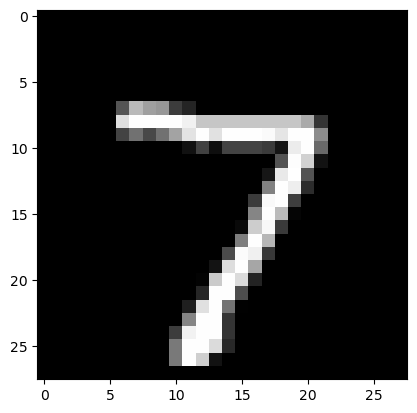

In [63]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print(img.shape)
print(label)


In [64]:
#we then convert the image into a batch form,containing a single image, using the unsqueez method
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
#let us then define a function predict_image that returns the predicted label for a single image tensor

In [67]:
def predict_image(img,model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    max_probs,preds = torch.max(yb,dim=1)
    return preds[0].item()

In [ ]:
#let  us try it out with a few images

label: 7 ,predicted: 7


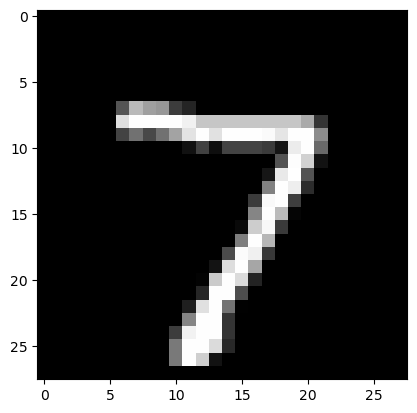

In [66]:
img,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('label:',label,',predicted:',predict_image(img,model))

label: 0 ,predicted: 0


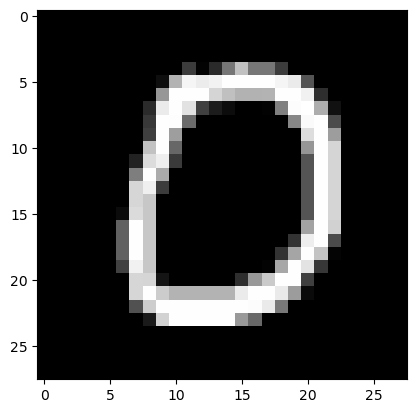

In [68]:
img,label = test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('label:',label,',predicted:',predict_image(img,model))

label: 9 ,predicted: 9


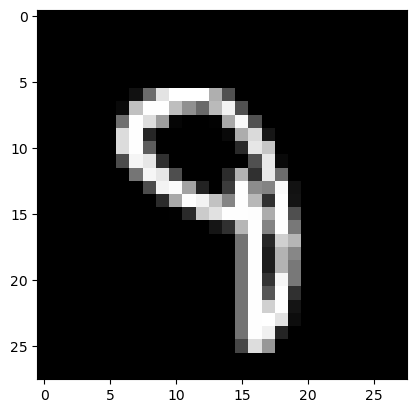

In [69]:
img,label = test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('label:',label,',predicted:',predict_image(img,model))

label: 8 ,predicted: 3


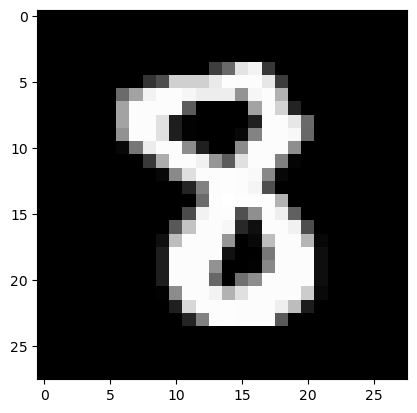

In [70]:
img,label = test_dataset[1893]
plt.imshow(img[0],cmap='gray')
print('label:',label,',predicted:',predict_image(img,model))

In [73]:
pip install jovian --upgrade



  Using cached jovian-0.2.47-py2.py3-none-any.whl (68 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6484 sha256=65f287011d1b6936e70bce2b9d08bae5296df9ccc71e39671c459727c0004ed0
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\e0\01\df\bd20df409bd81f8b99e6cd343c5f49731dc0a20eefefdafae0
Successfully built uuid


In [2]:
import jovian

<IPython.core.display.Javascript object>

In [3]:
test_loader = DataLoader(test_dataset,batch_size=200)

NameError: name 'DataLoader' is not defined

In [ ]:
test_loss,total,test_acc = evaluate(model,loss_fn,test_loader,metric=accuracy)
print('loss:{:.4f},accuracy:{:.4f}'.format(test_loss,test_acc))


In [7]:
jovian.commit(filename='Untitled6.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY:

  ········


[jovian] Committed successfully! https://jovian.com/danyal-hamza/untitled6


'https://jovian.com/danyal-hamza/untitled6'

In [ ]:
#we then find the overall loss and accuracy on the test data,it should be similar to that in the validation set